# RNN on Sine Wave Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generating Data

In [2]:
x = np.linspace(start = 0, stop = 50, num = 501)

In [3]:
y = np.sin(x)

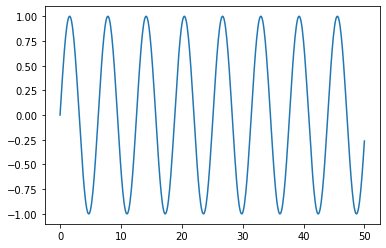

In [4]:
plt.plot(x, y)

In [5]:
df = pd.DataFrame(data = y, index = x, columns = ['Sine'])

In [6]:
df.head(10)

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
0.5,0.479426
0.6,0.564642
0.7,0.644218
0.8,0.717356
0.9,0.783327


### Splitting Data

In [7]:
len(df)

501

In [8]:
test_percent = 0.1    #### 10% percent

In [9]:
len(df)*test_percent     ### 50 data points

50.1

In [10]:
test_point = np.round(len(df)*test_percent)

In [11]:
test_point

50.0

In [12]:
test_ind = int(len(df) - test_point)

In [13]:
test_ind

451

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

### Scale Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

## Generating Batch

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [20]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(data = scaled_train, targets = scaled_train, length = length, batch_size = batch_size)

In [21]:
len(scaled_train)

451

In [22]:
len(generator)   ### 451 - length

401

In [23]:
X, y = generator[0]

In [24]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [25]:
y

array([[0.02053313]])

In [26]:
scaled_train[:52]

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


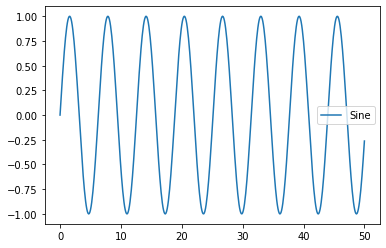

In [27]:
df.plot()

## Creating a Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [57]:
n_features = 1

In [58]:
model = Sequential()

model.add(SimpleRNN(units = 50, input_shape = (length, n_features)))

model.add(Dense(units = 1))

model.compile(loss = 'mse', optimizer = 'adam')

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [60]:
model.fit(generator, epochs = 5)

Epoch 1/5
401/401 [==============================] - 4s 9ms/step - loss: 0.0063
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 3.5798e-04
Epoch 3/5
401/401 [==============================] - 3s 8ms/step - loss: 6.6916e-04
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 3.8613e-05
Epoch 5/5
401/401 [==============================] - 3s 8ms/step - loss: 3.1758e-04


### Evaluation

In [61]:
losses = pd.DataFrame(model.history.history)

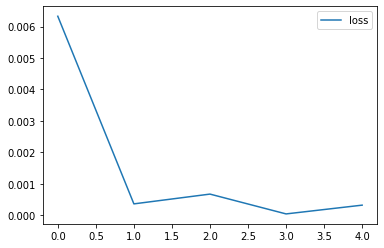

In [62]:
losses.plot()

In [63]:
first_eval_batch = scaled_train[-length:]

In [64]:
first_eval_batch = first_eval_batch.reshape(1, length, n_features)

In [65]:
model.predict(first_eval_batch)

array([[0.9514611]], dtype=float32)

In [66]:
scaled_test[0]

array([0.94955134])

### Creating test

In [67]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)


for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [68]:
test_predictions[:10]

[array([0.9514611], dtype=float32),
 array([0.9701733], dtype=float32),
 array([0.9839904], dtype=float32),
 array([0.99420184], dtype=float32),
 array([0.9981177], dtype=float32),
 array([0.9956414], dtype=float32),
 array([0.9890157], dtype=float32),
 array([0.9782409], dtype=float32),
 array([0.96086425], dtype=float32),
 array([0.93830967], dtype=float32)]

In [69]:
true_predictions = scaler.inverse_transform(test_predictions)

In [70]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
test.head()

,Sine,stock,Predictions,tinkered,LSTM Predictions
45.1,0.899097,[0.9809993],0.902917,[0.94839984],0.896794
45.2,0.938307,[1.0123824],0.940341,[0.9670045],0.934003
45.3,0.968142,[1.0415605],0.967975,[0.98071593],0.961426
45.4,0.988304,[1.0670906],0.988398,[0.9893977],0.978789
45.5,0.998591,[1.074553],0.996229,[0.99297935],0.985953


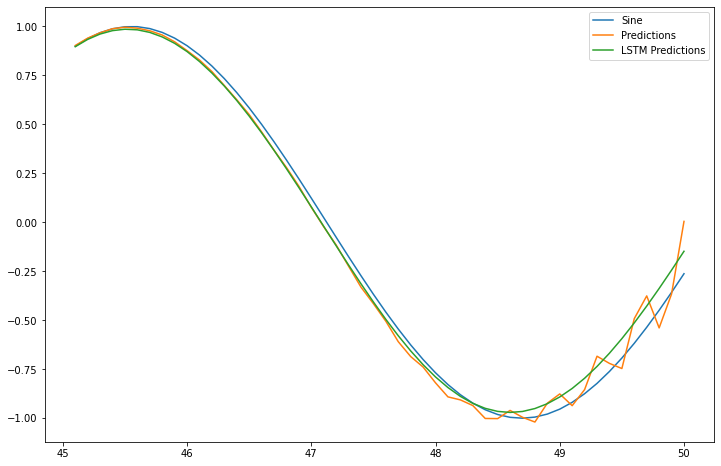

In [72]:
test.plot(figsize = (12, 8))

## LSTM and Forecasting

### Implementing Early Stopping

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
earlystop = EarlyStopping(monitor = "val_loss", patience = 2)

### Creating Validation Generator

In [75]:
validation_generator = TimeseriesGenerator(data = scaled_test, targets = scaled_test, length = length, batch_size = batch_size)

ValueError: ignored

In [76]:
scaled_test.shape

(50, 1)

**I am missing future point 'y' i need 51 values in my test data so a little bit change below so that we can use validation generator**

In [77]:
length = 49

generator = TimeseriesGenerator(data = scaled_train, targets = scaled_train, length = length, batch_size = batch_size)


validation_generator = TimeseriesGenerator(data = scaled_test, targets = scaled_test, length = length, batch_size = batch_size)

### Let's Create a LSTM model

In [81]:
model1 = Sequential()

model1.add(LSTM(units = 50, input_shape = (length, n_features)))

model1.add(Dense(units = 1))

model1.compile(loss = 'mse', optimizer = 'adam')

In [82]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


### Training model

In [83]:
model1.fit(generator, epochs = 6, validation_data = validation_generator, callbacks = [earlystop])

Epoch 1/6
402/402 [==============================] - 11s 21ms/step - loss: 0.0120 - val_loss: 8.9599e-05
Epoch 2/6
402/402 [==============================] - 8s 20ms/step - loss: 9.5514e-05 - val_loss: 7.5195e-06
Epoch 3/6
402/402 [==============================] - 8s 20ms/step - loss: 2.4907e-04 - val_loss: 2.2800e-05
Epoch 4/6
402/402 [==============================] - 8s 20ms/step - loss: 8.8742e-05 - val_loss: 9.9241e-05


### Evaluation

In [84]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)


for i in range(len(test)):

  current_pred = model1.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [85]:
true_predictions = scaler.inverse_transform(test_predictions)

In [86]:
test['LSTM Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


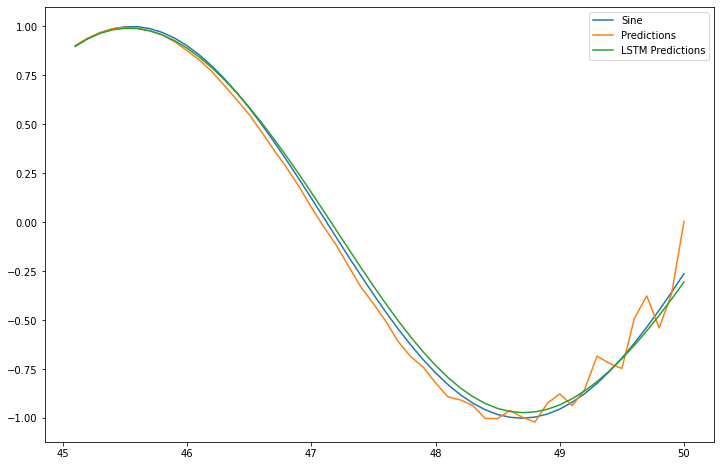

In [87]:
test.plot(figsize = (12, 8))

### Let's Forecast Beyond

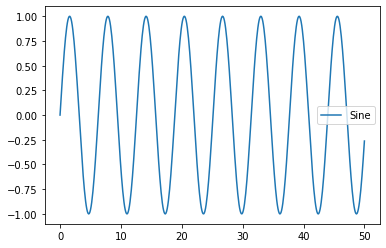

In [88]:
df.plot()

#### Scaling Data

In [89]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

#### Creating a Generator

In [90]:
generator = TimeseriesGenerator(data = scaled_full_data, targets = scaled_full_data, length = length, batch_size = batch_size)

#### Redefining Our Model

In [91]:
model = Sequential()

model.add(LSTM(units = 50, input_shape = (length, n_features)))

model.add(Dense(units = 1))

model.compile(loss = 'mse', optimizer = 'adam')

In [92]:
model.fit(generator, epochs = 6)

Epoch 1/6
452/452 [==============================] - 11s 20ms/step - loss: 0.0094
Epoch 2/6
452/452 [==============================] - 9s 20ms/step - loss: 1.8196e-04
Epoch 3/6
452/452 [==============================] - 9s 20ms/step - loss: 5.5513e-04
Epoch 4/6
452/452 [==============================] - 9s 20ms/step - loss: 5.0843e-05
Epoch 5/6
452/452 [==============================] - 9s 19ms/step - loss: 8.8263e-05
Epoch 6/6
452/452 [==============================] - 9s 20ms/step - loss: 7.6892e-05


#### Evaluation

In [93]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)


for i in range(25):      # Forecast 25 points into the future

  current_pred = model1.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [94]:
forecast = scaler.inverse_transform(forecast)

In [95]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [96]:
forecast_index = np.arange(50.1, 52.6, step = 0.1)

In [97]:
len(forecast_index)

25

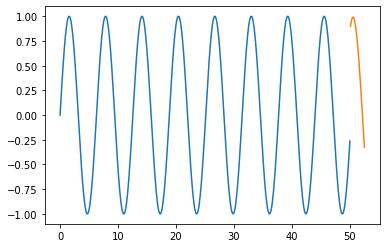

In [98]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)

**There's is cut off because those both are different Series if we combine them then there will be no cut off**

In [104]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ["Sine"])

In [105]:
forecast_df

,Sine
50.1,0.898849
50.2,0.936691
50.3,0.964710
50.4,0.982777
50.5,0.990891
50.6,0.989168
50.7,0.977821
50.8,0.957148
50.9,0.927512
51.0,0.889330


In [108]:
new_df = pd.concat([df, forecast_df], axis = 0)

In [109]:
new_df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
52.1,0.057347
52.2,-0.039066
52.3,-0.135555
52.4,-0.231171


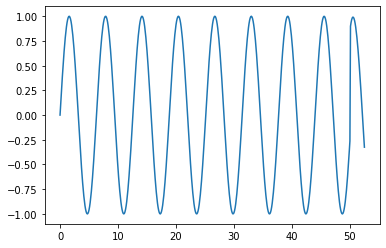

In [112]:
plt.plot(new_df.index, new_df['Sine'])

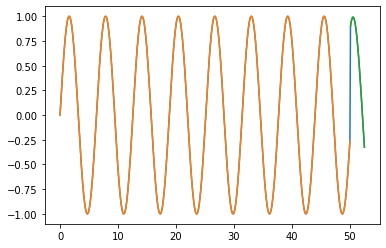

In [114]:
plt.plot(new_df.index, new_df['Sine'])
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)